In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
np.random.multivariate_normal?

(500, 2)


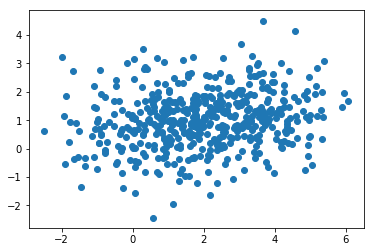

In [65]:
# try 
m1 = np.array([2.0 , 1.0])
cov1 = np.array([[3.0 , 0.2] ,
                 [0.2 , 1.0]])
a = np.random.multivariate_normal(m1,cov1,500)
print(a.shape)
plt.scatter(a[:,0] , a[:,1])
plt.show()

##Preparing Dataset

In [66]:
mean1 = np.array([0.5 , 0.5])
cov1 = np.array([
    [1.0 , 0.5] ,
    [0.5 , 0.75]
])

mean2 = np.array([3,4])
cov2 = np.array([
    [1.5 , 0.1],
    [0.1 , 1.0]
])

dist1 = np.random.multivariate_normal(mean1 , cov1 , 500)
dist2 = np.random.multivariate_normal(mean2 , cov2 , 500)

print(dist1.shape , dist2.shape)

(500, 2) (500, 2)


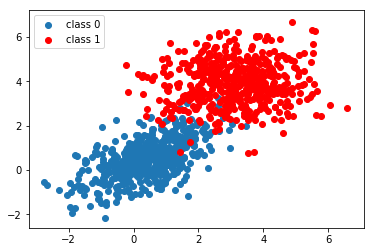

In [67]:

plt.scatter(dist1[:,0] , dist1[:,1] , label="class 0")
plt.scatter(dist2[:,0] , dist2[:,1] , c="r" , label="class 1")
plt.legend()
plt.show()

In [68]:
data = np.ones((1000,3))
labels = np.zeros((1000,1))

data[:500 , 1:] = dist1
data[500: , 1:] = dist2
labels[500: , : ] = 1.0

In [69]:
from sklearn.utils import shuffle
shuffle?

In [70]:
X,Y = shuffle(data , labels , random_state=0)
print(X.shape , Y.shape)
split = int(0.8*X.shape[0])
X_train = X[:split,:]
Y_train = Y[:split,:]
X_test = X[split:,:]
Y_test = Y[split:,:]

print(X_train.shape , X_test.shape, Y_train.shape , Y_test.shape)

(1000, 3) (1000, 1)
(800, 3) (200, 3) (800, 1) (200, 1)


In [201]:
print(X_train[:6,:])

[[ 1.          1.28320741  2.79609719]
 [ 1.          3.96346952  4.06848301]
 [ 1.         -1.80105628  0.69484162]
 [ 1.          2.15114926  4.88932334]
 [ 1.          3.92067878  2.93596429]
 [ 1.          1.51326914  3.33543395]]


## Separating hyperplane / Decision boundary

##Logistic Regression (Classification)

In [189]:
def hypothesis(x,theta):
    hx = (x*theta).sum()
    return sigmoid(hx)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

# for one particular entity
def gradientDescent(x,y,theta,lr=0.01):
    err = getError(x,y,theta)
    grad = getGrad(x,y,theta)
    
    theta-=lr*grad
    
    return err,theta
    
def getError(x,y,theta):
    err=0
    
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],theta)
        #err+=y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
        if(y[i]==1 and hx!=0):
            err+=np.log2(hx)
        elif(y[i]==0 and hx!=1):
            err+=np.log2(1-hx)
    
    return -err/m

def getGrad(x,y,theta):
    grad = np.zeros(theta.shape)
    m=x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad+=-1*(y[i]-hx)*x[i]
        
    grad/=m
    return grad



In [190]:
loss = []
accuracy = []
print(X_train.shape)

(800, 3)


In [191]:
theta = np.random.random(X_train.shape[1])
print(theta.shape)

(3,)


In [192]:
theta[0] = 0 
print(theta)

[0.         0.57113753 0.81027054]


In [193]:
def getAccuracy(Xtest , Ytest , theta):
    Ypred = []
    for i in range(Xtest.shape[0]):
        pred = prediction(Xtest[i],theta)
        Ypred.append(pred)
    Ypred = np.array(Ypred).reshape(-1,1)
        
    corr = float((Ypred==Ytest).sum())
    m = Xtest.shape[0]
    return corr/m

def prediction(x,theta):
    hx = hypothesis(x,theta)
    prob=hx
    if prob<0.5:
        return 0
    else:
        return 1

for i in range(1000):
    l,theta = gradientDescent(X_train , Y_train ,theta, lr=0.5)
    loss.append(l)
    accuracy.append(getAccuracy(X_test , Y_test,theta))

In [194]:
theta

array([-7.34339263,  0.94091916,  2.56226515])

In [195]:
loss[-10:]

[0.11781022209987756,
 0.11780095864959078,
 0.11779171621778739,
 0.11778249474131398,
 0.11777329415726284,
 0.11776411440296985,
 0.11775495541601304,
 0.11774581713421144,
 0.11773669949562579,
 0.11772760243855425]

In [196]:
accuracy[:10]

[0.65, 0.685, 0.73, 0.795, 0.825, 0.85, 0.87, 0.88, 0.885, 0.885]

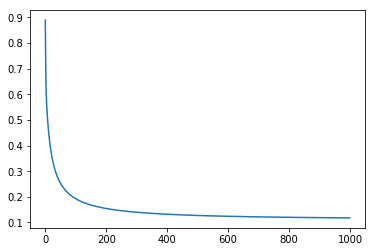

In [197]:
plt.plot(loss)
plt.show()

In [198]:
accuracy[-1]

0.985

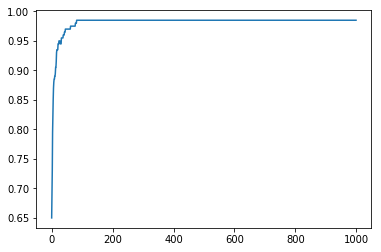

In [199]:
plt.plot(accuracy)
plt.show()

#Decision Boundary

(500, 2) (500, 2)


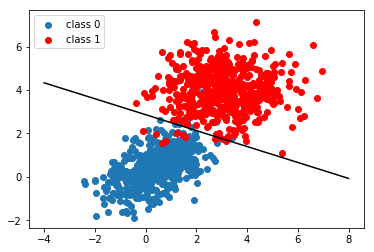

In [208]:
mean1 = np.array([0.5 , 0.5])
cov1 = np.array([
    [1.0 , 0.5] ,
    [0.5 , 0.75]
])

mean2 = np.array([3,4])
cov2 = np.array([
    [1.5 , 0.1],
    [0.1 , 1.0]
])

dist1 = np.random.multivariate_normal(mean1 , cov1 , 500)
dist2 = np.random.multivariate_normal(mean2 , cov2 , 500)

print(dist1.shape , dist2.shape)

plt.scatter(dist1[:,0] , dist1[:,1] , label="class 0")
plt.scatter(dist2[:,0] , dist2[:,1] , c="r" , label="class 1")
plt.legend()

x = np.linspace(-4,8,20)
y = -(theta[0] + theta[1]*x)/theta[2]
plt.plot(x,y,c="k")
plt.show()

In [204]:
theta

array([-7.34339263,  0.94091916,  2.56226515])